In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Reading dataset file
dataset = pd.read_csv('/content/drive/MyDrive/combine.txt/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
dataset

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [6]:
 dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [7]:
dataset.shape


(24058263, 2)

In [8]:
dataset.head()


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [9]:
dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [10]:
dataset.isnull().sum()

,0
Cust_Id,0
Rating,4499


In [11]:
movie_count = dataset.isnull().sum()[1]

movie_count

<ipython-input-11-4445fa145adf>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = dataset.isnull().sum()[1]


4499

In [12]:
movie_count


4499

In [13]:
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

470758

In [14]:
cust_count

470758

In [15]:

rating_count = dataset['Cust_Id'].count() - movie_count

rating_count

24053764

In [16]:
dataset.Rating.value_counts()

,count
Rating,
4.0,8085741
3.0,6904181
5.0,5506583
2.0,2439073
1.0,1118186


<ipython-input-17-27b13ee0d8b3>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = bar_value * 100 / p.sum()[0]


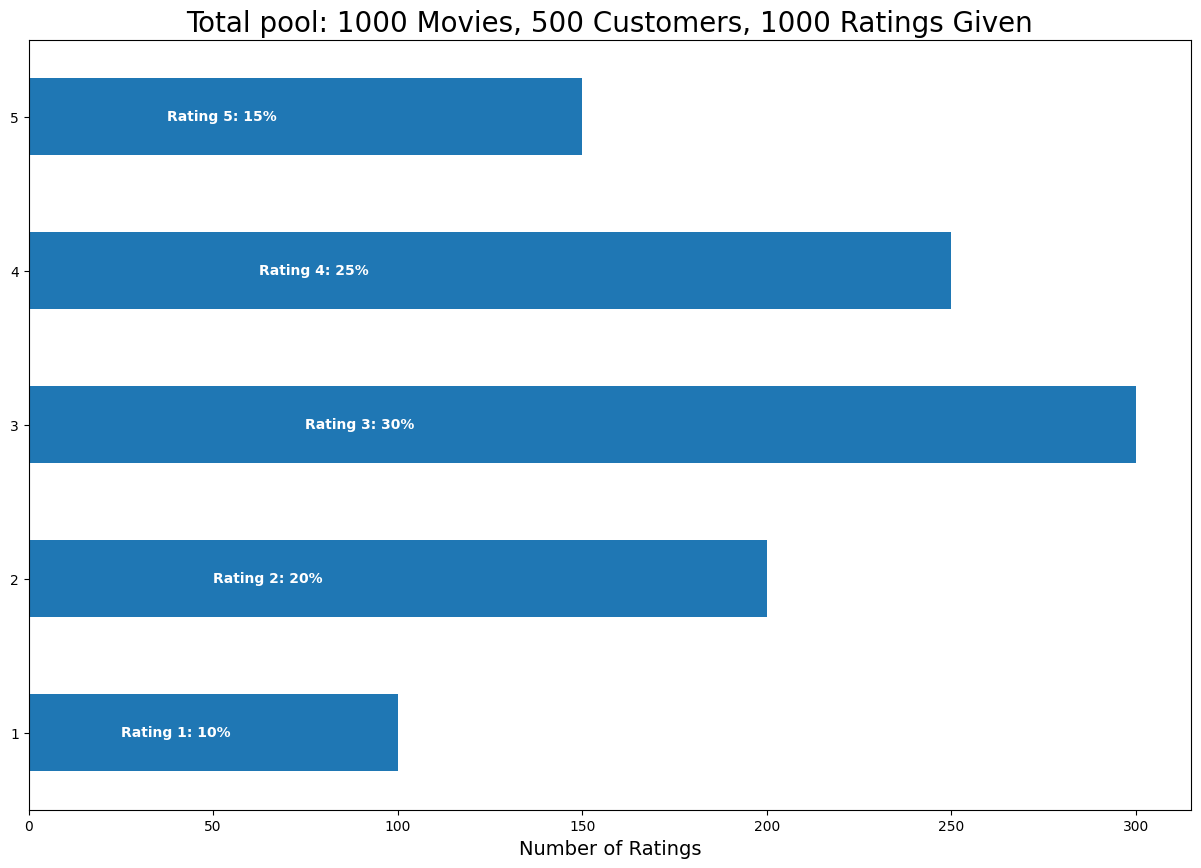

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {'Ratings': [100, 200, 300, 250, 150]}  # Example rating counts
p = pd.DataFrame(data, index=['1', '2', '3', '4', '5'])  # Index as ratings

# Plot as before
ax = p.plot(kind='barh', legend=False, figsize=(15, 10))

# Set the title
movie_count = 1000
cust_count = 500
rating_count = sum(data['Ratings'])
plt.title(
    f'Total pool: {movie_count} Movies, {cust_count} Customers, {rating_count} Ratings Given',
    fontsize=20
)

# Add annotations
for i in range(len(p)):
    bar_value = p.iloc[i, 0]
    percentage = bar_value * 100 / p.sum()[0]
    ax.text(
        bar_value / 4,
        i,
        f'Rating {i + 1}: {percentage:.0f}%',
        color='white',
        weight='bold',
        va='center'
    )

# Show the plot
plt.xlabel('Number of Ratings', fontsize=14)
plt.show()


In [18]:
# To count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating), )

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [19]:
# To store the index of all the rows containing 'nan' values
df_nan = df_nan[df_nan['Rating'] == True]


df_nan.shape

(4499, 1)

In [20]:
# To reset the index of the dataframe
df_nan = df_nan.reset_index()

df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [22]:
# Initialize an empty list for movie IDs
movie_np = []
movie_id = 1

# Iterate through pairs of indices to create arrays for each movie ID
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    # Create an array of movie_id repeated (i - j - 1) times
    temp = np.full(i - j - 1, movie_id)
    movie_np.append(temp)
    movie_id += 1

# Account for the last record and its corresponding length
last_record = np.full(len(dataset) - df_nan.iloc[-1, 0] - 1, movie_id)
movie_np.append(last_record)

# Concatenate all sub-arrays into a single NumPy array
movie_np = np.concatenate(movie_np)

# Print results
print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')


Movie numpy: [   1    1    1 ... 4499 4499 4499]
Length: 24053764


In [23]:
#To append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

<ipython-input-23-83f5a995ec51>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Movie_Id'] = movie_np.astype(int)


-Dataset examples-


<ipython-input-23-83f5a995ec51>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [24]:
dataset.shape

(24053764, 3)

**Data Cleaning**

In [25]:
f = ['count','mean']
#count and mean

In [26]:
# Group by 'Movie_Id' and count the number of ratings for each movie
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].count()

# Ensure the indices are integers
dataset_movie_summary.index = dataset_movie_summary.index.map(int)

# Calculate the 30th percentile for the count of ratings
movie_benchmark = dataset_movie_summary.quantile(0.3)

# Identify movies rated less often (below the benchmark)
drop_movie_list = dataset_movie_summary[dataset_movie_summary < movie_benchmark].index

# Print the movie benchmark
print('Minimum number of reviews for a movie to be in the top 30%: {}'.format(movie_benchmark))


Minimum number of reviews for a movie to be in the top 30%: 227.0


In [27]:
#To create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f) #mean and count of customer id
dataset_cust_summary.index = dataset_cust_summary.index.map(int) #integer format
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
#                                           6                       <  5
#drop_cust_list[3,4]
print(f'Customer minimum times of review: {cust_benchmark}')



Customer minimum times of review: 52.0


In [28]:
print(f'Original Shape: {dataset.shape}')

Original Shape: (24053764, 3)


In [29]:
dataset = dataset[~dataset['Movie_Id'].isin(drop_movie_list)]
#in dataset --->in all movie ids------>if the whic ever  movies we put under drop list are present or not---
#if present drop /remove them
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
#removing all inactive users from our dataset
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (18311319, 3)


**Create ratings matrix for 'ratings' matrix with Rows = userId, Columns = movieId**

In [31]:
 df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 3151)


In [32]:
df_p.head()

Movie_Id,1,3,5,6,8,10,12,15,16,17,...,4489,4490,4491,4492,4493,4495,4496,4497,4498,4499
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df_title = pd.read_csv('/content/drive/MyDrive/combine.txt/NetflixMovieData.csv', encoding = "ISO-8859-1", header = None,usecols=[0,1,2], names = ['Movie_Id', 'Year', 'Name'])
df_title


,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [34]:
pip install scikit-surprise

In [35]:
# Import required libraries
import math

import matplotlib.pyplot as plt

from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [36]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD()

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0143  1.0021  1.0115  1.0093  0.0052  
MAE (testset)     0.8134  0.8047  0.8060  0.8080  0.0038  
Fit time          1.72    1.52    1.71    1.65    0.09    
Test time         0.31    0.19    0.19    0.23    0.05    


{'test_rmse': array([1.01431902, 1.00212317, 1.01147039]),
 'test_mae': array([0.81340247, 0.80473311, 0.80595713]),
 'fit_time': (1.7197966575622559, 1.5154879093170166, 1.7137982845306396),
 'test_time': (0.3088228702545166, 0.19400238990783691, 0.19060778617858887)}

In [37]:
dataset.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1


**To find all the movies rated as 5 stars by user with userId = 712664**

In [38]:
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

,Name
Movie_Id,
3,Paula Abdul's Get Up & Dance
79,Winter Kills
175,The History Channel Presents: Troy: Unearthing...
199,The Fall of the Roman Empire
241,Neon Genesis Evangelion: The End of Evangelion
256,Charlotte's Web
261,Herbie Rides Again
348,The Swarm
357,The Onion Field
